## Q.1

#### (a) Draw n = 300 real numbers uniformly at random on [0, 1], call them x1, . . . , xn.  
#### (b) Draw n real numbers uniformly at random on [− 1 , 1 ], call them ν1,...,νn.

In [1]:
import os
import struct
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(42)
n=300
X = np.random.uniform(0,1,size = n).reshape((n,1))
MU = np.random.uniform(-.1,.1,size = n).reshape((n,1))
Y = np.zeros(n).reshape((n,1))

#### (c) Let di = sin(20xi) + 3xi + νi, i = 1, . . . , n. Plot the points (xi, di), i = 1, . . . , n.

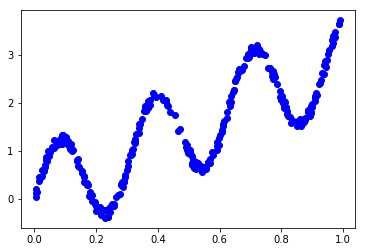

In [2]:
D = np.sin(20*X) + 3*X + MU
plt.plot(X,D,'bo')
plt.show()

We will consider a 1 × N × 1 neural network with one input, N = 24 hidden neurons, and 1 output neuron. The network will thus have 3N + 1 weights including biases. Let w denote the vector of all these 3N + 1 weights. The output neuron will use the activation function φ(v) = v; all other neurons will use the activation function φ(v) = tanhv. Given input x, we use the notation f(x,w) to represent the network output.

In [3]:
### Step 1 to 4
# Number of hidden layer's neurons
N = 24
W = np.random.uniform(-.1,.1,size = (3*N+1)).reshape((3*N+1,1))
eta = 4
epsilon = 1e-8
mse = list()
mse.append(1e2)
mse.append(1e1)
l=0
m = 0 

epoch = 2
U = np.zeros(N)
Z = U
A = W[0:N]
B = W[N:2*N]
C = W[2*N:3*N]
e = W[-1]

In [4]:
### Step 5

while (np.abs(mse[-1]-mse[-2])>=epsilon):
    m += 1
    index = np.random.choice(np.arange(n), size= n,  replace=False)
    # Step 5.A and C
    for i in index: 
        U = X[i]*A + B
        Z = np.tanh(U)  
        Y[i] = np.transpose(Z).dot(C) + e
        # update A:   
        A += 2 / n * eta * X[i] * (D[i]-Y[i]) * (1-Z) * (1+Z) * C
        # update B:   
        B += 2 / n * eta * (D[i]-Y[i]) * (1-Z) * (1+Z) * C
        # update C:   
        C += 2 / n * eta * (D[i]-Y[i]) * Z
        # update e:   
        e += 2 / n * eta * (D[i]-Y[i])
            
    # Step 5.B
    mse.append(np.sum((D-Y)**2)/n)
    epoch +=1

    if (epoch-2) % 2000 == 0:
        print('The current epoch is {}, MSE is {}, eta is {}.'.format((epoch-2) ,round(mse[epoch-2],7) , eta))
        if (epoch-2) % 6000 == 0:
            eta *= 0.5
            
            
# delete the 2 dummpy points
epoch -= 2
del(mse[0:2])

The current epoch is 2000, MSE is 0.2734198, eta is 4.
The current epoch is 4000, MSE is 0.0568886, eta is 4.
The current epoch is 6000, MSE is 0.0070565, eta is 4.
The current epoch is 8000, MSE is 0.0047691, eta is 2.0.
The current epoch is 10000, MSE is 0.0047136, eta is 2.0.
The current epoch is 12000, MSE is 0.0045142, eta is 2.0.
The current epoch is 14000, MSE is 0.0040327, eta is 1.0.
The current epoch is 16000, MSE is 0.0039895, eta is 1.0.
The current epoch is 18000, MSE is 0.0038325, eta is 1.0.
The current epoch is 20000, MSE is 0.003672, eta is 0.5.
The current epoch is 22000, MSE is 0.003659, eta is 0.5.


#### (d) Use the backpropagation algorithm with online learning to find the optimal weights/network that minimize the mean-squared error (MSE) 1  n (di −f(xi,w))2. Use some η of your choice. Plot the number of n~i~=1 epochs vs the MSE in the backpropagation algorithm.

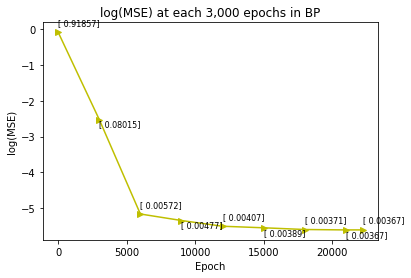

In [76]:
fig, ax = plt.subplots()
ny = np.arange(epoch)
m = ny[ny%3000 == 0]
m = np.append(m,ny[-1])
mse =  DataFrame(mse, columns = ['MSE'])
A = np.array(mse.iloc[m])
plt.plot(m,np.log(A),'y->')
for i, txt in enumerate(A):
    ax.annotate(np.round(txt.tolist(),5), (m[i], np.log(A[i])+0.2*(-1)**i),fontsize = 8)
plt.xlabel('Epoch')
plt.title('log(MSE) at each 3,000 epochs in BP')
plt.ylabel('log(MSE)')
plt.show()


#### (e) Plot the curve f(x, w0) as x ranges from 0 to 1 on top of the plot of points in (c). The fit should be a “good” fit.

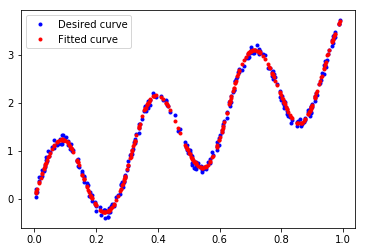

In [72]:
W0 =W
Desired_curve = D
Fitt
ed_curve = Y
for i in range(n):
    Y[i] = np.transpose(np.tanh(X[i] * W0[0:N] +W0[N:2*N])).dot(W0[2*N:3*N]) + W0[-1]
plot1, = plt.plot(X,Desired_curve,'bo',markersize = 3)
plot2, = plt.plot(X,Fitted_curve,'ro',markersize = 3)
plt.legend([plot1,plot2],["Desired curve", "Fitted curve"])
plt.show()

#### (f) Pseudocode of implementation.

1. Given n, N, and $\epsilon$.

2. Initialize $\eta \in \mathbb{R}, W \in \mathbb{R}^{(3N+1) \times 1}$ randomly.  Note: $W = {A,B,C,d}$, where $A \in \mathbb{R}^N, B \in \mathbb{R}^N, C \in \mathbb{R}^N, e in \mathbb{R}$.

3. Initialize epoch = 0. 

4. Initialize $MSE_{epoch}$ = 0 for epoch = 0, 1, ... .  

5. Do SGD, so sample n numbers out range(n) without replacement as the index:
    1. for i in index, do (this loop is where we compute the mse of each epoch):  
        1. Compute the induced local fields as a vector with the current training sample and weights by:
           $$
                U = x_i \cdot A +  B  \in \mathbb{R}^N
                $$        
        2. Then, get the N outputs from the N hidden neurons  as a vector by:
        $$
        Z = tanh(U)  \in \mathbb{R}^N
        $$
        3. So, the output of the last neuron will be:
        $$
        y_i = Z^T \cdot  C+ e
        $$
    2.  Compute the MSE for current epoch:
         $$
                    MSE_{epoch} = \frac{1}{n}\sum_{i=1}^n(d_i-y_i)^2
                    $$
            Then, update the epoch:
          $$
                    epoch \leftarrow epoch +1.
                    $$
    3. for i = 1 to n, do (this loop is where we update the weights):   
        Note: 
        $$
        \frac{\partial tanh(U)}{\partial U} = \begin{bmatrix}  \frac{\partial tanh(u_1)}{\partial u_1} & \frac{\partial tanh(u_1)}{\partial u_2} &  \cdots & \frac{\partial tanh(u_1)}{\partial u_{24}} \\ \frac{\partial tanh(u_2)}{\partial u_1} & \frac{\partial tanh(u_2)}{\partial u_2} &  & \vdots \\  \vdots & & \ddots & \vdots \\ \frac{\partial tanh(u_{24})}{\partial u_1} & \cdots & \cdots & \frac{\partial tanh(u_{24})}{\partial u_{24}} \end{bmatrix} = \begin{bmatrix}  \frac{\partial tanh(u_1)}{\partial u_1} & \cdots & 0 \\ \vdots & \ddots &  \vdots \\  0 & \cdots & \frac{\partial tanh(u_{24})}{\partial u_{24}} \end{bmatrix} = \begin{bmatrix}  1- tanh^2(u_1) & \cdots & 0 \\ \vdots & \ddots &  \vdots \\  0 & \cdots & 1- tanh^2(u_{24}) \end{bmatrix} 
        $$
        3. update the A here:  
            1. According to the backpropogation algorithm, we have:
                $$
                \frac{\partial MSE}{\partial A} = -x_i \cdot \frac{2}{n}(d_i-y_i) \cdot \frac{\partial tanh(U)}{\partial U} \cdot C = -x_i \cdot \frac{2}{n}(d_i-y_i) \cdot (1-tanh(U)) \bigodot  (1+tanh(U)) \bigodot C
                $$
            2. The update would be:
                $$
                A \leftarrow A - \eta \frac{\partial MSE}{\partial A} =A + \eta x_i \cdot \frac{2}{n}(d_i-y_i) \cdot (1-tanh(U)) \bigodot  (1+tanh(U)) \bigodot C
                $$
        4. update the B here:   
            1. According to the backpropogation algorithm, we have:
                $$
               \frac{\partial MSE}{\partial B} = -1 \cdot \frac{2}{n}(d_i-y_i) \cdot \frac{\partial tanh(U)}{\partial U} \cdot C = -1 \cdot \frac{2}{n}(d_i-y_i) \cdot (1-tanh(U)) \bigodot  (1+tanh(U)) \bigodot C
                $$
            2. The update would be:
                $$
                B \leftarrow B - \eta \frac{\partial MSE}{\partial B} =B + \eta \frac{2}{n}(d_i-y_i) \cdot (1-tanh(U)) \bigodot  (1+tanh(U)) \bigodot C
                $$
        5. update the C here:  
            1. According to the backpropogation algorithm, we have:
                $$
                \frac{\partial MSE}{\partial C} = -tanh(U) \cdot \frac{2}{n}(d_i - y_i)
                $$
            2. The update would be:
                $$
                C \leftarrow C - \eta \frac{\partial MSE}{\partial C} =C + \eta \frac{2}{n}(d_i-y_i) \cdot tanh(U)
                $$
        6. update the e here:  
            1. According to the backpropogation algorithm, we have:
                $$
                \frac{\partial MSE}{\partial e} = -\frac{2}{n}(d_i - y_i)
                $$
            2. The update would be:
                $$
                e \leftarrow e - \eta \frac{\partial MSE}{\partial e} =e + \eta \frac{2}{n}(d_i-y_i)
                $$
        7. for every kth (k = 6000) epoch:
            $$\eta = 0.5 * \eta$$
    2. Loop to A, if $abs(MSE_{epoch} - MSE_{epoch-1}) >\epsilon$. 
    
        
Reamrk: Could consider to reduce the $\eta$ after a certain epochs systematically. 






### 2. 
(150pts) In this computer project, we will design a neural network for digit classification using the backpropagation algorithm (see the notes above). You should use the MNIST data set (see Homework 2 for details) that consists of 60000 training images and 10000 test images. The training set should only be used for training, and the test set should only be used for testing. Your final report should include the following:

####  0. Input the data files

In [2]:
# save the original binary MNIST data files in 0-255
def read(dataset = "training", path = "."):
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError( "It needs to be between 'testing' and 'training'")

    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)
        # print(len(lbl))
    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        image = np.fromfile(fimg, dtype=np.uint8)      
        image = image.reshape(len(lbl), rows, cols)

    get_image = lambda idx: (lbl[idx], image[idx])

    for i in range(len(lbl)):
        yield get_image(i)

training_data = list(read(dataset = "training",path = r'C:\Users\Han\Desktop\Box Sync\CS 559\hwk2'))
testing_data = list(read(dataset = "testing",path = r'C:\Users\Han\Desktop\Box Sync\CS 559\hwk2'))
training_label = np.zeros((len(training_data),1))
training_desiredout =np.zeros((len(training_data),10))
training_image = np.zeros((len(training_data),28*28))
testing_label = np.zeros((len(testing_data),1))
testing_desiredout = np.zeros((len(testing_data),10))
testing_image = np.zeros((len(testing_data),28*28))

# split the training and testing data to labels and images
for i in range(len(training_data)):
    temp = training_data[i]
    training_label[i] = temp[0]
    training_desiredout[i,temp[0]] = 1 
    training_image[i,] = temp[1].reshape(1,28*28)
#training_label = training_label.reshape((1,60000))
for i in range(len(testing_data)):
    temp = testing_data[i]
    testing_label[i] = temp[0]
    testing_desiredout[i,temp[0]] = 1 
    testing_image[i,] = temp[1].reshape(1,28*28)
#testing_label = testing_label.reshape((1,10000))

# Rename data
X_train = training_image
X_test = testing_image
Y_train = training_desiredout
Y_test = testing_desiredout
# Standardize X (images from 0-255 to 0-1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### 1. First try 
#####  1. Architecture of NN: 784 input neurons, 1 hidden layer with $N_1$ = 100 neurons, 10 output neurons with 0 or 1 as their outputs to be compatible with the use of 0-1 vector outputs.  
##### 2. Output: With [1 0 · · · 0] representing a 0, [0 1 0 · · · 0] representing a 1 and so on, it is denoted as $f(x_i,w)$.  
##### 3.1 Activation functions:, tanh() from input to 1st hidden layer and softmax from 1st hidden layer to output.  
##### 3.2 Leanring rate:     0.1.   
##### 3.2 Weight initialization:    all weights are intialized randomly from unifrom(-0.5,0.5).   
##### 4. Energy function: MSE in the form of: $\frac{1}{n}\sum_{i=1}^{n}||d_i-f(x_i,w)||^2$.
##### 5. Other tricks: reduce the eta by 50% when at plateau.

In [6]:
## initialization
np.random.seed(2)
# use first n samples from training data to train the NN
n = 60000
# number of neurons in 1st hidden layer, N1
N1 = 100
# learning rate
eta = 1e-2
# convergence threshold
epsilon = 5e-8
# epoch number 
epoch = 2
# batch size
bs = 1
# initialize errors
mse = list()
mse.append(1e3)
mse.append(5e2)
# initialize real outputs given the current w
out = np.zeros((n,10))
# initialize weights from input to 1st hidden layer
u = np.random.uniform(-0.05,0.05,size = (784*N1)).reshape(784,N1)
# initialize weights from 1st hidden layer to output
v = np.random.uniform(-0.2,0.2,size = (10*N1)).reshape(N1,10)
# initialzie the bias
b = np.random.normal(-0.1,0.1,size = (bs*N1)).reshape(bs,N1)

# define softmax actiavtion function
def softmax(w):
    e = np.exp(np.array(w) - np.max(w))
    dist = e / np.sum(e)
    return dist
# define a continuous vector to 0-1 vector functin
def vec_to_01(x):
    s1 = np.zeros(x.shape[0])
    q = np.argmax(x)
    s1[q] =1
    return s1
# define softmax's Jacobian matrix function
def softmax_jacobian(s):
    return np.diagflat(s) - np.outer(s, s)
# define tanh's Jacobian matrix function
def tanh_jacobian(t):
    return np.diagflat(1-t**2)
def cross_S(out, Label):
    return - np.sum(np.multiply(out, np.log(Label)) + np.multiply((1-out), np.log(1-Label)))

In [10]:
while (np.abs(mse[-1]-mse[-2])>=epsilon):
    index = np.random.choice(np.arange(n), size= n,  replace=False)
    X_train_rndm = X_train[index]
    # this loop is where we update the weights
    for i in range(0,n, bs): 
        lf1 = np.dot(X_train_rndm[i:(i+bs)],u) + b  #compute the input layers' induced local field
        z0 = np.tanh(lf1)          #compute the input layer's out
        lf2 = np.dot(z0,v)             #compute the 1st H layers' induced local field
        out[i:(i+bs)] = softmax(lf2)        #compute the 1st H layer's out
        if (True):
            # update u:   
            temp1 = 2 / n * eta *(Y_train[i:(i+bs)] - out[i:(i+bs)]).dot(softmax_jacobian(lf2))
            temp2 = np.dot(temp1,v.T)
            temp2 = temp2.dot(tanh_jacobian(lf1))
            u -= np.outer(X_train_rndm[i:(i+bs)],temp2)
            # update b:   
            b -= temp2
            # update v:   
            v -= np.outer(z0, temp1)            
    #  calculate mse for the current epoch
    mse.append(np.sum((out-Y_train)**2)/n)
    epoch +=1
    
    if mse[epoch-2] <= mse[epoch-1]:
        eta *= 0.5
    #if (epoch-2) % 2 == 0:
        #print('The current epoch is {}, MSE is {}, eta is {}.'.format((epoch-2) ,round(mse[epoch-2],7) , eta))
                        
# delete the 2 dummpy points
epoch -= 2
del(mse[0:2])            

In [12]:
u0 = u
b0 = b
v0 = v
#  Initialize errors = 0.
error_test = 0
# loop on all testing samples
for i in range(10000):
    lf1 = np.dot(X_train_rndm[i:(i+bs)],u) + b  #compute the input layers' induced local field
    z0 = np.tanh(lf1)          #compute the input layer's out
    lf2 = np.dot(z0,v)             #compute the 1st H layers' induced local field
    out[i:(i+bs)] = softmax(lf2)        #compute the 1st H layer's out
    # Find the largest component of v0 = [v0', v1', ...v9']^T^
    predic_out = np.argmax(out[i,:])
    #  If the prediceted output is different to the testing label, error +=1
    diff = predic_out - np.argmax(Y_test[i,:])
    if diff != 0:
        error_test += 1
error_test/10000

0.122

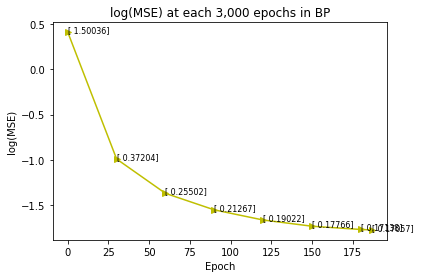

In [270]:
fig, ax = plt.subplots()
ny = np.arange(epoch)
m = ny[ny%30 == 0]
m = np.append(m,ny[-1])
mse =  pd.DataFrame(mse, columns = ['MSE'])
A = np.array(mse.iloc[m])
plt.plot(m,np.log(A),'y->')
for i, txt in enumerate(A):
    ax.annotate(np.round(txt.tolist(),5), (m[i], np.log(A[i])),fontsize = 8)
plt.xlabel('Epoch')
plt.title('log(MSE) at each 3,000 epochs in BP')
plt.ylabel('log(MSE)')
plt.show()

#### Clearly, we at not satisfied with a 12.2% errorrate on the test data. And I concluded that it was due to the undernumber of the neurons in the hidden layer, careless initialization of parameters and/or hyperparameters, and lack of other tricks. Thus, I had my 2nd try:

### 2. Second try 
#####  1. Architecture of NN: 784 input neurons, 1 hidden layer with $N_1$ = 150 neurons, 10 output neurons with 0 or 1 as their outputs to be compatible with the use of 0-1 vector outputs.  
##### 2. Output: With [1 0 · · · 0] representing a 0, [0 1 0 · · · 0] representing a 1 and so on, it is denoted as $f(x_i,w)$.  
##### 3.1 Activation functions:, tanh() from input to 1st hidden layer and softmax from 1st hidden layer to output.  
##### 3.2 Leanring rate:     Set to 0.03 due to the emperical principle $\eta \sim O(1/ \sqrt{m})$, m is 784 here.   
##### 3.2 Weight initialization:    For hyperbolic tangent units: sample a Uniform(-r, r) with $r = \sqrt{\frac{6}{fan-in + fan-out}}$; For softmax tangent units: sample a Uniform(-r, r) with $r = 4\sqrt{\frac{6}{fan-in + fan-out}}$ (fan-in is the number of inputs of the unit, fan-out is the number of outputs of the unit); For bias: sample the same way as the associated weight. 
##### 4. Energy function: MSE in the form of: $\frac{1}{n}\sum_{i=1}^{n}||d_i-f(x_i,w)||^2$.
##### 5. Other tricks: SGD optimizer; reduce the eta by 50% when at plateau; carry 90% of the last epoch's gradient over to the current epoch when updating; Early termination (done mannully)

In [278]:
## initialization
np.random.seed(2)
# use first n samples from training data to train the NN
n = 60000
# number of neurons in 1st hidden layer, N1
N1 =150
# learning rate
eta = 0.03
# convergence threshold
epsilon = 5e-7
# epoch number 
epoch = 2
# batch size
bs = 1
# initialize errors
mse = list()
mse.append(1e3)
mse.append(5e2)
# initialize real outputs given the current w
out = np.zeros((n,10))
# initialize weights from input to 1st hidden layer
u = np.random.uniform(-0.05,0.05,size = (784*N1)).reshape(784,N1)
# initialize weights from 1st hidden layer to output
v = np.random.uniform(-0.2,0.2,size = (10*N1)).reshape(N1,10)
# initialzie the bias
b = np.random.uniform(-0.05,0.05,size = (bs*N1)).reshape(bs,N1)
# initialize condi
m = 0
l = 0
# intialize momentum
momentum = 0.9

In [279]:
while (np.abs(mse[-1]-mse[-2])>=epsilon):
    m += 1
    index = np.random.choice(np.arange(n), size= n,  replace=False)
    X_train_rndm = X_train[index]
    # re-initialzie last epoch's gradients
    grad_uold = 0
    grad_bold = 0
    grad_vold = 0
    # this loop is where we update the weights
    for i in range(0,n, bs): 
        l +=1
        lf1 = np.dot(X_train_rndm[i:(i+bs)],u) + b  #compute the input layers' induced local field
        z0 = np.tanh(lf1)          #compute the input layer's out
        lf2 = np.dot(z0,v)             #compute the 1st H layers' induced local field
        out[i:(i+bs)] = softmax(lf2)        #compute the 1st H layer's out
        if (True):
            # update u:   
            temp1 = 2 / n * eta * (Y_train[i:(i+bs)]-out[i:(i+bs)]).dot(softmax_jacobian(lf2))
            temp2 = np.dot(temp1,v.T)
            temp2 = temp2.dot(tanh_jacobian(lf1))
            grad_u= np.outer(X_train_rndm[i:(i+bs)],temp2)
            grad_u = grad_uold*momentum+grad_u
            u -= grad_u
            grad_uold = grad_u           
            # update b:   
            grad_b = (temp2)
            grad_b = grad_bold*momentum+grad_b
            b -=grad_b
            grad_bold = grad_b           
            # update v:  
            grad_v = np.outer(z0, temp1)
            grad_v = grad_vold*momentum+grad_v
            v -=grad_v
            grad_vold = grad_v           
    #  calculate mse for the current epoch
    mse.append(np.sum((out-Y_train)**2)/n)
    epoch +=1
    if mse[epoch-2] <= mse[epoch-1]:
        eta *= 0.5           
# delete the 2 dummpy points
epoch -= 2
del(mse[0:2])         

The current epoch is 1, MSE is 500.0, eta is 0.05.
The current epoch is 2, MSE is 0.905694, eta is 0.05.
The current epoch is 3, MSE is 0.9045923, eta is 0.05.
The current epoch is 4, MSE is 0.9036999, eta is 0.05.
The current epoch is 5, MSE is 0.9041162, eta is 0.025.
The current epoch is 6, MSE is 0.9044415, eta is 0.0125.
The current epoch is 7, MSE is 0.9055231, eta is 0.00625.


KeyboardInterrupt: 

In [14]:
u0 = u
b0 = b
v0 = v
#  Initialize errors = 0.
error_test = 0
# loop on all testing samples
for i in range(10000):
    lf1 = np.dot(X_train_rndm[i:(i+bs)],u) + b  #compute the input layers' induced local field
    z0 = np.tanh(lf1)          #compute the input layer's out
    lf2 = np.dot(z0,v)             #compute the 1st H layers' induced local field
    out[i:(i+bs)] = softmax(lf2)        #compute the 1st H layer's out
    # Find the largest component of v0 = [v0', v1', ...v9']^T^
    predic_out = np.argmax(out[i,:])
    #  If the prediceted output is different to the testing label, error +=1
    diff = predic_out - np.argmax(Y_test[i,:])
    if diff != 0:
        error_test += 1
error_test/10000

0.0672

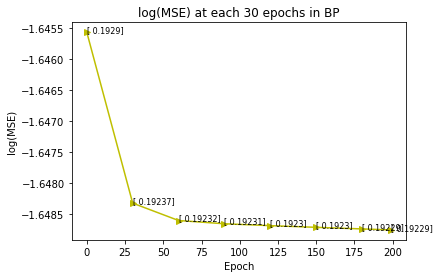

In [153]:
fig, ax = plt.subplots()
ny = np.arange(epoch)
m = ny[ny%30 == 0]
m = np.append(m,ny[-1])
mse =  pd.DataFrame(mse, columns = ['MSE'])
A = np.array(mse.iloc[m])
plt.plot(m,np.log(A),'y->')
for i, txt in enumerate(A):
    ax.annotate(np.round(txt.tolist(),5), (m[i], np.log(A[i])),fontsize = 8)
plt.xlabel('Epoch')
plt.title('log(MSE) at each 30 epochs in BP')
plt.ylabel('log(MSE)')
plt.show()

#### 6.72% to 12.2% error rate on the test data was a big boost. But I concluded that cross-entropy will be a better choice of the energy function of the than good old MSE. Meanwhile, adding more neurons will definitely help me to get into the 5% error rate club. Thus, I had my 3rd try:

### 3. Third try 
#####  1. Architecture of NN: 784 input neurons, 1 hidden layer with $N_1$ = 250 neurons, 10 output neurons with 0 or 1 as their outputs to be compatible with the use of 0-1 vector outputs.  
##### 2. Output: With [1 0 · · · 0] representing a 0, [0 1 0 · · · 0] representing a 1 and so on, it is denoted as $f(x_i,w)$.  
##### 3.1 Activation functions:, tanh() from input to 1st hidden layer and softmax from 1st hidden layer to output.  
##### 3.2 Leanring rate:     Set to 0.03 due to the emperical principle $\eta \sim O(1/ \sqrt{m})$, m is 784 here.   
##### 3.2 Weight initialization:    For hyperbolic tangent units: sample a Uniform(-r, r) with $r = \sqrt{\frac{6}{fan-in + fan-out}}$; For softmax units: sample a Uniform(-r, r) with $r = 4\sqrt{\frac{6}{fan-in + fan-out}}$ (fan-in is the number of inputs of the unit, fan-out is the number of outputs of the unit); For bias: sample the same way as the associated weight. 
##### 4. Energy function: Cross-entropy in the form of: $-\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{10}d_{ij} log(f(x_i,w)_j)$, where j represents the 10 output classes.
##### 5. Other tricks: SGD optimizer; reduce the eta by 50% when at plateau; carry 82% of the last epoch's gradient over to the current epoch when updating; Early termination (done mannully)

In [4]:
## initialization
np.random.seed(2)
# use first n samples from training data to train the NN
n = 60000
# number of neurons in 1st hidden layer, N1
N1 = 250
# learning rate
eta = 0.03
# convergence threshold
epsilon = 5e-8
# epoch number 
epoch = 2
# batch size
bs = 1
# initialize errors
entropy = list()
entropy.append(1e1)
entropy.append(5e0)
# initialize real outputs given the current w
out = np.zeros((n,10))
# initialize weights from input to 1st hidden layer
u = np.random.uniform(-0.05,0.05,size = (784*N1)).reshape(784,N1)
# initialize weights from 1st hidden layer to output
v = np.random.uniform(-0.2,0.2,size = (10*N1)).reshape(N1,10)
# initialzie the bias
b = np.random.normal(-0.1,0.1,size = (bs*N1)).reshape(bs,N1)
# initialize condi
m = 0
l = 0
# intialize momentum
momentum = 0.82

In [5]:

while (np.abs(entropy[-1]-entropy[-2])>=epsilon):
    m += 1
    index = np.random.choice(np.arange(n), size= n,  replace=False)
    X_train_rndm = X_train[index]
    # re-initialzie last epoch's gradients
    grad_uold = 0
    grad_bold = 0
    grad_vold = 0
    # this loop is where we update the weights
    for i in range(0,n, bs): 
        lf1 = np.dot(X_train_rndm[i:(i+bs)],u) + b  #compute the input layers' induced local field
        z0 = np.tanh(lf1)          #compute the input layer's out
        lf2 = np.dot(z0,v)             #compute the 1st H layers' induced local field
        out[i:(i+bs)] = softmax(lf2)        #compute the 1st H layer's out
        if (True):
            # update u:   
            temp1 = 1 / n * eta * np.sum(Y_train[i:(i+bs)] / out[i:(i+bs)], axis = 0).dot(softmax_jacobian(lf2))
            temp2 = np.dot(temp1,v.T)
            temp2 = temp2.dot(tanh_jacobian(lf1))
            grad_u= np.outer(X_train_rndm[i:(i+bs)],temp2)
            grad_u = grad_uold*momentum+grad_u
            u -= grad_u
            grad_uold = grad_u
           
            # update b:   
            grad_b = (temp2)
            grad_b = grad_bold*momentum+grad_b
            b -=grad_b
            grad_bold = grad_b
           
            # update v:  
            grad_v = np.outer(z0, temp1)
            grad_v = grad_vold*momentum+grad_v
            v -=grad_v
            grad_vold = grad_v
            #if (i%1000 == 0):
                 #print(np.mean(u**2),np.mean(b**2),np.mean(v**2),i)
           
            if np.isnan(v).sum ()>0:
                break
            
    #  calculate mse for the current epoch
    entropy.append(-np.sum(np.log(out) * Y_train)/n)
    epoch +=1

    if (epoch-2) % 2 == 0:
        print('The current epoch is {}, entropy is {}, eta is {}.'.format((epoch-2) ,round(entropy[epoch-2],7) , eta))
        if entropy[epoch-2] <= entropy[epoch-1]:
            eta *= 0.5
            
            
# delete the 2 dummpy points
epoch -= 2
del(entropy[0:2])         

The current epoch is 2, entropy is 2.3293869, eta is 0.001.
The current epoch is 4, entropy is 2.3156306, eta is 0.001.
The current epoch is 6, entropy is 2.3145826, eta is 0.001.
The current epoch is 8, entropy is 2.3144166, eta is 0.0005.
The current epoch is 10, entropy is 2.3126246, eta is 0.0005.
The current epoch is 12, entropy is 2.3125176, eta is 0.00025.
The current epoch is 14, entropy is 2.3135191, eta is 0.00025.
The current epoch is 16, entropy is 2.3121888, eta is 0.00025.


KeyboardInterrupt: 

In [157]:
u0 = u
b0 = b
v0 = v
#  Initialize errors = 0.
error_test = 0
# loop on all testing samples
for i in range(10000):
    lf1 = np.dot(X_train_rndm[i:(i+bs)],u) + b  #compute the input layers' induced local field
    z0 = np.tanh(lf1)          #compute the input layer's out
    lf2 = np.dot(z0,v)             #compute the 1st H layers' induced local field
    out[i:(i+bs)] = softmax(lf2)        #compute the 1st H layer's out
    # Find the largest component of v0 = [v0', v1', ...v9']^T^
    predic_out = np.argmax(out[i,:])
    #  If the prediceted output is different to the testing label, error +=1
    diff = predic_out - np.argmax(Y_test[i,:])
    if diff != 0:
        error_test += 1
error_test/10000

0.0463

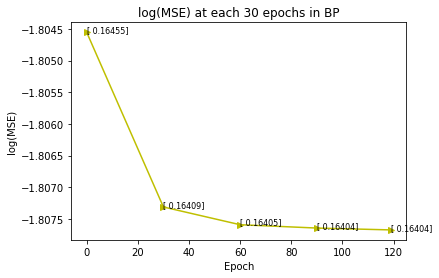

In [161]:
fig, ax = plt.subplots()
ny = np.arange(epoch)
m = ny[ny%30 == 0]
m = np.append(m,ny[-1])
mse =  pd.DataFrame(mse, columns = ['MSE'])
A = np.array(mse.iloc[m])
plt.plot(m,np.log(A),'y->')
for i, txt in enumerate(A):
    ax.annotate(np.round(txt.tolist(),5), (m[i], np.log(A[i])),fontsize = 8)
plt.xlabel('Epoch')
plt.title('log(MSE) at each 30 epochs in BP')
plt.ylabel('log(MSE)')
plt.show()

#### Now, with an errorrate of 4.63%. We have accomplised our goal with the 3rd try, where the pseudocode was listed below:

1. Given n, $N_1$, momentum and $\epsilon$.

2. Initialize $\eta \sim O(1/ \sqrt{m}) \in \mathbb{R}, u \in \mathbb{R}^{(784) \times N_1}$ and $b \in \mathbb{R}^{1 \times N_1}$ by Uniform(-r, r) with $r = \sqrt{\frac{6}{fan-in + fan-out}}$, then $v \in \mathbb{R}^{N_1 \times 10}$ by Uniform(-r, r) with $r = 4\sqrt{\frac{6}{fan-in + fan-out}}$. (fan-in is the number of inputs of the unit, fan-out is the number of outputs of the unit)

3. Initialize epoch = 0. 

4. Initialize $loss_{epoch}$ = 0 for epoch = 0, 1, ... .  

5. Do SGD, so sample n numbers out range(n) without replacement as the index:
    1. for i in index, do (this loop is where we compute the mse of each epoch):  
        1. Compute the 1st induced local fields as a vector with the current training sample and weights by:
           $$
                K= x_i \cdot u +  b  \in \mathbb{R}^{1 \times N_1}
                $$        
        2. Then, get the outputs from the N_1 hidden neurons  as a vector by:
        $$
        Z = tanh(K)  \in \mathbb{R}^{1 \times N_1}
        $$
        3. Do the same for the rest, the outputs of the 10 output neurons will be:
        $$
        L = Z^T \cdot  v
        $$
        $$
        y_i = softmax(L)
        $$
    2.  Compute the Cross-entropy for current epoch:
         $$
                    loss_{epoch} = -\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{10}d_{ij} log(f(x_i,w)_j)
                    $$
            Then, update the epoch:
          $$
                    epoch \leftarrow epoch +1.
                    $$
    3. for i = 1 to n, do (this loop is where we update the weights):   
        Note: 
        $$
        \frac{\partial tanh(U)}{\partial U} = \begin{bmatrix}  \frac{\partial tanh(u_1)}{\partial u_1} & \frac{\partial tanh(u_1)}{\partial u_2} &  \cdots & \frac{\partial tanh(u_1)}{\partial u_{q}} \\ \frac{\partial tanh(u_2)}{\partial u_1} & \frac{\partial tanh(u_2)}{\partial u_2} &  & \vdots \\  \vdots & & \ddots & \vdots \\ \frac{\partial tanh(u_{q})}{\partial u_1} & \cdots & \cdots & \frac{\partial tanh(u_{q})}{\partial u_{q}} \end{bmatrix} = \begin{bmatrix}  1- tanh^2(u_1) & \cdots & 0 \\ \vdots & \ddots &  \vdots \\  0 & \cdots & 1- tanh^2(u_{q}) \end{bmatrix} = (1-tanh(U)) \bigodot  (1+tanh(U))
        $$
        $$
         \frac{\partial softmax(U)}{\partial U} = \begin{bmatrix}  \frac{\partial softmax(u_1)}{\partial u_1} & \frac{\partial softmax(u_1)}{\partial u_2} &  \cdots & \frac{\partial softmax(u_1)}{\partial u_{q}} \\ \frac{\partial softmax(u_2)}{\partial u_1} & \frac{\partial softmax(u_2)}{\partial u_2} &  & \vdots \\  \vdots & & \ddots & \vdots \\ \frac{\partial softmax(u_{24})}{\partial u_1} & \cdots & \cdots & \frac{\partial softmax(u_{q})}{\partial u_{q}} \end{bmatrix} = \begin{bmatrix}  u_1(\delta_{11}-u_1)& \cdots & u_1(\delta_{1q}-u_q) \\ \vdots & \ddots &  \vdots \\   u_q(\delta_{q1}-u_1) & \cdots &  u_q(\delta_{qq}-u_q) \end{bmatrix} = U \cdot I - U \otimes U^T
        $$
        3. update the u here:  
            1. According to the backpropogation algorithm, we have:
                $$
                \frac{\partial loss}{\partial u} = -x_i \cdot \frac{1}{n}(d_i-y_i) \cdot \frac{\partial softmax(L)}{\partial L} \cdot v \cdot \frac{\partial tanh(K)}{\partial K} = -x_i \cdot \frac{1}{n}(d_i-y_i) \cdot (L \cdot I - L \otimes L^T) \cdot v \cdot (1-tanh(K)) \bigodot  (1+tanh(K))
                $$
            2. The update would be:
                $$
                u_{(t)} \leftarrow u_{(t-1)} \cdot momentum - \eta  \frac{\partial loss}{\partial u} = u_{(t-1)} \cdot momentum - x_i \cdot \frac{1}{n}(d_i-y_i) \cdot (L \cdot I - L \otimes L^T) \cdot v \cdot (1-tanh(K)) \bigodot  (1+tanh(K))
                $$     
        4. update the b here:   
            1. According to the backpropogation algorithm, we have:
                $$
                \frac{\partial loss}{\partial b} = - \frac{1}{n}(d_i-y_i) \cdot \frac{\partial softmax(L)}{\partial L} \cdot v \cdot \frac{\partial tanh(K)}{\partial K} = - \frac{1}{n}(d_i-y_i) \cdot (L \cdot I - L \otimes L^T) \cdot v \cdot (1-tanh(K)) \bigodot  (1+tanh(K))
                $$
            2. The update would be:
                $$
                b_{(t)} \leftarrow b_{(t-1)} \cdot momentum - \eta  \frac{\partial loss}{\partial b} =b_{(t-1)} \cdot momentum - \frac{1}{n}(d_i-y_i) \cdot (L \cdot I - L \otimes L^T) \cdot v \cdot (1-tanh(K)) \bigodot  (1+tanh(K))
                $$  
        5. update the v here:  
            1. According to the backpropogation algorithm, we have:
                $$
                \frac{\partial loss}{\partial v} = -tanh(K) \cdot \frac{1}{n}(d_i - y_i) \cdot \frac{\partial softmax(L)}{\partial L}
                $$
            2. The update would be:
                $$
                v_{(t)} \leftarrow v_{(t-1)} \cdot momentum - \eta  \frac{\partial loss}{\partial v} =v_{(t-1)} \cdot momentum - \frac{1}{n}(d_i-y_i) \cdot Z  \cdot (L \cdot I - L \otimes L^T)
                $$  

        6. for every kth (k = 6000) epoch:
            $$\eta = 0.5 * \eta$$ if loss_{epoch} - loss_{epoch-1} >0
    2. Loop to A, if $abs(loss_{epoch} - loss_{epoch-1}) >\epsilon$. 
    
        
Reamrk: The initiliazation needs some try and error. 